# Trabajo Práctico 0:  Algoritmo de Maximización de la Esperanza

**Profesor**: Saúl Calderón Ramírez

**Estudiantes**:

* Ricardo Chacon
* Marco Ferraro
* Gabriel Valentine


## 1. Algoritmo de Maximización de la Esperanza con datos artificiales

En esta sección se llevará a cabo una implementación de un algoritmo de maximización de la esperanza. Se utilizará un grupo de funciones base.

### 1.1 Generate Data

Esta función se encarga de generar observaciones aleatorias de `K` distribuciones Gaussianas. Por defecto `K` va a presentar valor de 2.  Se recibe de parametro `N` que representa la tolidad de puntos u observaciones que se quiere generar. Un array de medias y otro de desviaciones estandar de las distribuciones respectivas.

Cabe destacar que esta función retorna todas las observaciones en una matriz de dimension `Nx1`.

In [74]:
import numpy as np

def generate_data(N, means: np.ndarray, stds: np.ndarray, K=2):
  if len(means) != len(stds):
    print("Error in dimensions")
    return None
  else:
    data = []
    for i in range(K):
      y = np.sqrt(-2 * np.log(np.random.rand(N // K))) * np.cos(2 * np.pi * np.random.rand(N // 2))
      y = (y * stds[i]) + means[i]

      data.append(y)

    X = np.concatenate(data)

    # Mezclar datos para que no esten ordenados
    np.random.shuffle(X)

    return X.reshape(-1, 1)



In [75]:
N = 100

means = [3.0, 7.0]
stds = [0.5, 0.8]

data = generate_data(N=100, means=means, stds=stds)
data

array([[7.95833999],
       [3.53599756],
       [2.36597353],
       [5.96658963],
       [7.63915525],
       [4.07100672],
       [3.37098027],
       [7.30924707],
       [6.67137135],
       [6.1965262 ],
       [3.54340543],
       [2.46593521],
       [8.15572925],
       [8.14587477],
       [6.8071011 ],
       [6.87868857],
       [5.83361248],
       [3.50320837],
       [7.65939407],
       [7.71835628],
       [5.85482329],
       [7.24609929],
       [3.43111236],
       [6.19153713],
       [2.47046749],
       [7.29094225],
       [3.11587335],
       [8.42703734],
       [2.63426307],
       [2.92376897],
       [6.89967512],
       [7.63512944],
       [7.30629805],
       [5.08417341],
       [5.99326778],
       [5.90916379],
       [2.80825765],
       [7.9305508 ],
       [2.89530347],
       [2.40170398],
       [7.82210877],
       [7.7427205 ],
       [7.32778518],
       [2.99981597],
       [3.14782381],
       [3.78857846],
       [3.40979143],
       [5.829

In [76]:
import matplotlib.pyplot as plt
import numpy as np

def plot_data(data, title='Two Normal Distributions'):
    hist_values, bin_edges = np.histogram(data, bins=20)
    fig, ax = plt.subplots(figsize=(8, 6))
    ax.bar(bin_edges[:-1], hist_values, width=np.diff(bin_edges), color='skyblue', alpha=0.7, label='Frequency')
    ax.scatter(data, np.zeros_like(data), marker='o', s=30, color='b', label='Data')

    y_min, y_max = ax.get_ylim()
    ax.set_ylim(y_min - 0.5, y_max + 0.1)

    ax.set_xlabel('Value')
    ax.set_ylabel('Frequency')
    ax.set_title(title)
    ax.grid(True, which='both')

    ax.legend()
    plt.show()

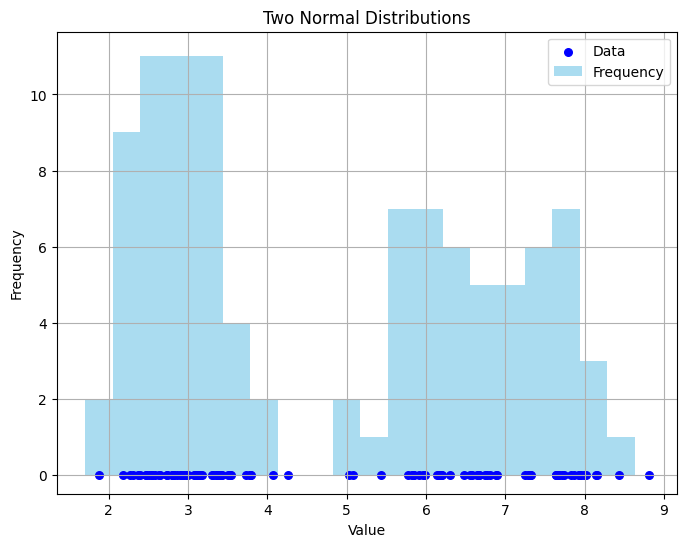

In [77]:
plot_data(data)

In [78]:

# El asterisco es para desempacar la tupla.
def init_random_parameters(K, mean_range=(0, 10), std_range=(0, 1)):
  means = np.random.uniform(*mean_range, size=K)
  stds = np.random.uniform(*std_range, size=K)

  params = np.column_stack((means, stds)).tolist()

  return params

In [79]:
init_random_parameters(3)

[[1.5343251599978802, 0.2776627896955861],
 [5.599847565798095, 0.568447164765027],
 [2.0604762111253128, 0.581055784807348]]

In [80]:
import numpy as np

def calculate_likelihood_gaussian_observation(x_n, mu_k, sigma_k):
     if sigma_k == 0:
          return None
     else:
          log_likelihood = -0.5 * np.log(2 * np.pi * sigma_k**2) - 0.5 * (1 / sigma_k) * (x_n - mu_k)**2
          return log_likelihood


In [81]:
import unittest
import numpy as np

class TestCalculateLikelihood(unittest.TestCase):

    def test_likelihood_with_zero_sigma(self):
        x_n = 1.0
        mu_k = 1.0
        sigma_k = 0.0
        result = calculate_likelihood_gaussian_observation(x_n, mu_k, sigma_k)

        self.assertIsNone(result)

    def test_likelihood_1(self):
        sigma_k = 1.0
        x_n = 0.0
        mu_k = 0.0

        result = calculate_likelihood_gaussian_observation(x_n, mu_k, sigma_k)

        expected_result = -0.9189385332046727
        self.assertAlmostEqual(result, expected_result, places=5)

    def test_likelihood_2(self):
        sigma_k = 2.0
        x_n = 3.0
        mu_k = 1.5

        result = calculate_likelihood_gaussian_observation(x_n, mu_k, sigma_k)
        expected_result = -2.174585713764618
        self.assertAlmostEqual(result, expected_result, places=5)


In [82]:
if __name__ == '__main__':
    loader = unittest.TestLoader()
    suite = loader.loadTestsFromTestCase(TestCalculateLikelihood)
    runner = unittest.TextTestRunner()
    runner.run(suite)


...
----------------------------------------------------------------------
Ran 3 tests in 0.001s

OK


In [83]:
x_n = 1.0
mu_k = 0.0
sigma_k = 1.0

likelihood = calculate_likelihood_gaussian_observation(x_n, mu_k, sigma_k)

# Comprobación
print(f'Likelihood: {likelihood}')

Likelihood: -1.4189385332046727


In [84]:
import numpy as np

def calculate_membership_dataset(X_dataset, Parameters_matrix):
    N, K = X_dataset.shape[0], Parameters_matrix.shape[0]
    M = np.zeros((N, K))

    for i in range(N):
        for k in range(K):
            mu_k, sigma_k = Parameters_matrix[k]
            log_likelihood = calculate_likelihood_gaussian_observation(X_dataset[i], mu_k, sigma_k)
            M[i, k] = log_likelihood

    # Aplicar normalización softmax para obtener valores entre 0 y 1
    M = np.exp(M - np.max(M, axis=1, keepdims=True))
    M /= np.sum(M, axis=1, keepdims=True)

    return M

# Prueba Unitaria
X_dataset = np.array([[2.5], [3.0], [1.8], [2.2]])  # Ejemplo de dataset (4 observaciones)
Parameters_matrix = np.array([[2.0, 0.5], [3.0, 0.3]])  # Ejemplo de matriz de parámetros (2 clusters)

membership_matrix = calculate_membership_dataset(X_dataset, Parameters_matrix)

# Comprobación
print("Matriz de Membresía:")
print(membership_matrix)


Matriz de Membresía:
[[0.41479957 0.58520043]
 [0.18081647 0.81918353]
 [0.86403014 0.13596986]
 [0.62617475 0.37382525]]


C:\Users\Marco\AppData\Local\Temp\ipykernel_9944\3771472917.py:11: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  M[i, k] = log_likelihood


In [85]:
import torch

def recalculate_parameters(X_dataset, Membership_data):
    X_torch = torch.tensor(X_dataset, dtype=torch.float32)
    Membership_torch = torch.tensor(Membership_data, dtype=torch.float32)

    # Calcular nuevas medias
    new_means = torch.matmul(Membership_torch.T, X_torch) / torch.sum(Membership_torch, dim=0, keepdim=True)

    # Calcular nuevas desviaciones estándar
    deviations = X_torch.unsqueeze(1) - new_means
    squared_deviations = deviations ** 2
    weighted_squared_deviations = squared_deviations * Membership_torch.unsqueeze(2)
    new_std = torch.sqrt(torch.sum(weighted_squared_deviations, dim=0) / torch.sum(Membership_torch, dim=0, keepdim=True))

    return new_means.numpy(), new_std.numpy()

# Ejemplo de uso
X_dataset = np.array([[2.5], [3.0], [1.8], [2.2]], dtype=np.float32)
Membership_data = np.array([[0.2, 0.8], [0.6, 0.4], [0.3, 0.7], [0.9, 0.1]], dtype=np.float32)

new_means, new_std = recalculate_parameters(X_dataset, Membership_data)

print("Nuevas Medias:")
print(new_means)

print("\nNuevas Desviaciones Estándar:")
print(new_std)



Nuevas Medias:
[[2.41 2.41]
 [2.34 2.34]]

Nuevas Desviaciones Estándar:
[[0.42532343 0.42532343]
 [0.4476606  0.4476606 ]]
